In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy  as np

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
orial_data = pd.read_csv('data/train.csv',parse_dates=[2])
orial_data.head()
orial_data.shape[0]

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1017209

In [3]:
#数据拷贝一份进行处理，避免 对原始数据的改变
data_data = orial_data.copy()
#data_data.describe()
data_data.shape[0]

1017209

In [4]:
# 加载store 数据
store = pd.read_csv('data/store.csv')
data_store = store.copy()
#异常值处理
fill_values = {'CompetitionOpenSinceYear': 0, 'CompetitionDistance': 1, 'CompetitionOpenSinceMonth': 2, 'CompetitionOpenSinceYear': 0,'Promo2SinceWeek':0,'Promo2SinceYear':0,'PromoInterval':'None' }
data_store.fillna(value=fill_values,inplace = True)
store_drop_columns = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
data_store.drop(store_drop_columns,axis=1,inplace=True)
data_store.head(20)
data_store.shape[0]


1115

In [5]:
#加载test 数据
test = pd.read_csv('data/test.csv')
data_test = test.copy()
data_test.fillna(value={'Open':1},inplace=True)
data_test.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [6]:
#将字符的属性转换成数字
replace_data = {'a':1,'b':2,'c':3,'d':4}
print(type(data_store))
print(type(data_store['Assortment']))
print(type(data_store.Assortment))
data_store['Assortment'].replace(replace_data,inplace=True)
data_store['StoreType'].replace(replace_data,inplace=True)

data_store.head(10)

data_data['StateHoliday'].replace(replace_data,inplace=True)
data_data['StateHoliday'] = data_data['StateHoliday'].apply(pd.to_numeric)
data_data.shape[0]

data_test['StateHoliday'].replace(replace_data,inplace=True)
data_test['StateHoliday'] = data_test['StateHoliday'].apply(pd.to_numeric)
print(data_test['StateHoliday'].unique())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
[0 1]


In [7]:
# 进行归一化 对CompetitionDistance

scaler = MinMaxScaler()
x = data_store['CompetitionDistance'].values.reshape(-1,1)
data_store['CompetitionDistance'] = scaler.fit_transform(x)
data_store.head(5)


,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,3,1,0.016728,0
1,2,1,1,0.007501,1
2,3,1,1,0.186253,1
3,4,3,3,0.008160,0
4,5,1,1,0.394271,0


In [8]:
#pd.get_dummies(data_store)
data_test.head(1)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0


In [9]:
data_data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [10]:
# 提取出月份、年份,数据增加年份和月份的列
import time, datetime
def conver_date(data):
    print(data.head(5))
    data_month = pd.to_datetime(data['Date'],format='%Y-%m-%d %H:%M:%S')
    data_date = pd.to_datetime(data['Date'],format='%Y/%m/%d')
    data['year'] = data_date.dt.year
    data['month'] = data_date.dt.month
    data['day'] = data_date.dt.day
    data.drop('Date',axis=1,inplace=True)
    return data
data_data = conver_date(data_data)
data_test = conver_date(data_test)
data_test.head(5)
    
#print(time.strftime('%Y-%m-%d %H:%M:%S'))
#data_month = pd.to_datetime(data_data['Date'],format='%Y-%m-%d %H:%M:%S')

#record['ym']=record['HAPPEN_TIME']
#data_year =data_data['Date'].apply(lambda x:x.split('-')[0])
#data_date = pd.to_datetime(data_data['Date'],format='%Y/%m/%d')
#data_data['year'] = data_date.dt.year
#data_data['month'] = data_date.dt.month
#data_data['day'] = data_date.dt.day
#data_data.drop('Date',axis=1,inplace=True)


#month2str = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
#data_data['month2str'] = data_data.month.map(month2str)
#data_data.head(25)
#data_data.shape[0]

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Id  Store  DayOfWeek        Date  Open  Promo  StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1             0              0
1   2      3          4  2015-09-17   1.0      1             0              0
2   3      7          4  2015-09-17   1.0      1             0              0
3   4      8          4  2015-09-17   1.0      1             0              0
4   5      9         

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,1,1,4,1.0,1,0,0,2015,9,17
1,2,3,4,1.0,1,0,0,2015,9,17
2,3,7,4,1.0,1,0,0,2015,9,17
3,4,8,4,1.0,1,0,0,2015,9,17
4,5,9,4,1.0,1,0,0,2015,9,17


In [11]:
data_data.shape[0]
#选取open = 1 的数据
data_data = data_data.loc[(data_data['Open'] == 1)]
print(data_data.shape[0])
data_data  = data_data.loc[(data_data['Sales'] > 0)]
print(data_data.shape[0])


844392
844338


In [12]:
#选取某一个店的ID,获取其销售记录 并显示其每个月的销售情况
def get_month_sales_by_id(id):
    store_data = data_data.loc[(data_data['Store'] == 1)]
    store_data_2013 = store_data.loc[store_data['year'] == 2013]
    store_data_2014 = store_data.loc[store_data['year'] == 2014]
    store_data_2015 = store_data.loc[store_data['year'] == 2015]
    
    #计算每年每个月的销售情况
    store_data_2013_month = store_data_2013.groupby(by=['month'])['Sales'].sum()
    store_data_2014_month = store_data_2014.groupby(by=['month'])['Sales'].sum()
    store_data_2015_month = store_data_2015.groupby(by=['month'])['Sales'].sum()
    store_data_2015_month.rename(columns={"month":"sum_of_value"},inplace=True)
    
    #print(store_data_2015_month.to_frame().columns())
    #print(store_data_2015_month[1])
    #print(store_data_2015_month.head(20))
    store_data_month={}
    store_data_month['2013'] = store_data_2013_month
    store_data_month['2014'] = store_data_2014_month
    store_data_month['2015'] = store_data_2015_month
    
    return store_data_month
a=get_month_sales_by_id(5)
print("2014 1",a['2014'][1])

2014 1 118814


In [13]:
month_info = get_month_sales_by_id(5)
month_info['2015'][8] = month_info['2015'][9] = month_info['2015'][10] =  month_info['2015'][11] = month_info['2015'][12] = 0
for i in month_info:
    print(i)
    print(month_info[i])

2013
month
1     128431
2     125271
3     145169
4     118009
5     118225
6     113411
7     128032
8     118320
9     108867
10    114641
11    127596
12    145168
Name: Sales, dtype: int64
2014
month
1     118814
2     110434
3     116467
4     115292
5     117715
6     107905
7     122604
8     111004
9     106398
10    114897
11    130852
12    161026
Name: Sales, dtype: int64
2015
month
1     119602
2     106635
3     118917
4     110655
5     105220
6     110011
7     121266
8          0
9          0
10         0
11         0
12         0
dtype: int64


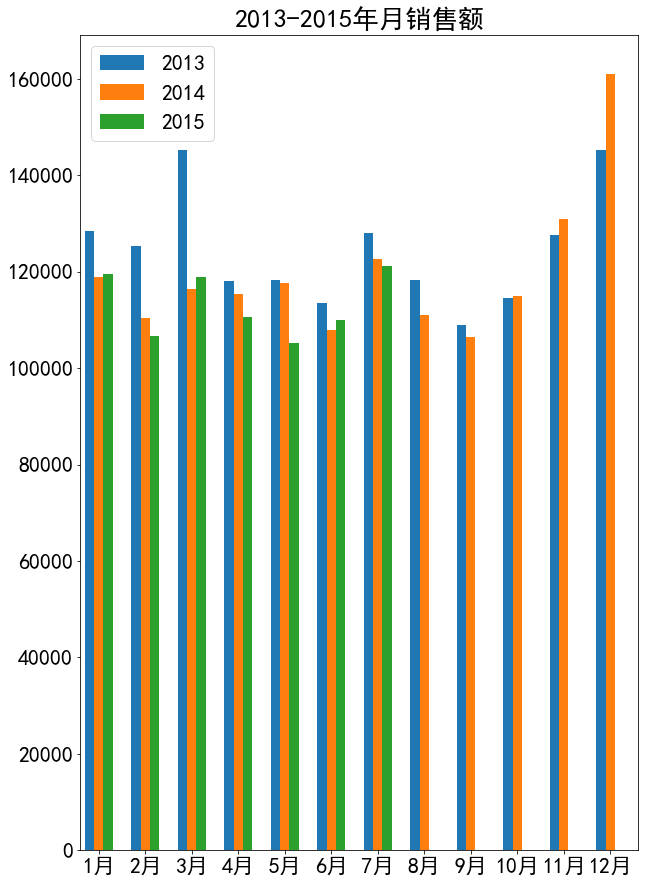

In [14]:


#解决中文乱码的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

#X=[0,1,2,3,4,5,6,7,8,9,10,11]
x_labels = ['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月']
X = np.arange(12)
bar_width = 0.2
Y=[222,42,455,664,454,334,222,42,455,664,454,334]

fig = plt.figure(figsize=(10,15))
ax = plt.subplot()
bars = []
years = []
ij = 0
for i in month_info:
    ij = ij +1
    bar_i = ax.bar(X+bar_width*ij,month_info[i],bar_width)
    bars.append(bar_i)
    years.append(i)

#bar_1 = ax.bar(X+bar_width,month_info['2013'],bar_width)
#bar_2 = ax.bar(X+bar_width*2,month_info['2014'],bar_width)
#bar_3 = ax.bar(X+bar_width*3,month_info['2015'],bar_width)
ax.set_xticklabels(x_labels)
plt.xticks(X+bar_width*2)
plt.xlim(0,len(x_labels))
plt.title('2013-2015年月销售额')
handles, labels = ax.get_legend_handles_labels()

plt.legend(bars, years,loc = 'best')
#plt.set_xticks(x_labels)
#plt.savefig('./year_month.jpg')
plt.show()


In [15]:
#归一化处理
scaler = MinMaxScaler()
x = data_data['Customers'].values.reshape(-1,1)
data_data['Customers'] = scaler.fit_transform(x)
data_data.head(5)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,1,5,5263,0.074119,1,1,0,1,2015,7,31
1,2,5,6064,0.083604,1,1,0,1,2015,7,31
2,3,5,8314,0.110163,1,1,0,1,2015,7,31
3,4,5,13995,0.201897,1,1,0,1,2015,7,31
4,5,5,4822,0.074661,1,1,0,1,2015,7,31


In [16]:
data_data = data_data.merge(data_store,left_on = 'Store',right_on = 'Store',how="left")
print(data_data.shape[0])
data_data.head(10)
#

844338


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,5263,0.074119,1,1,0,1,2015,7,31,3,1,0.016728,0
1,2,5,6064,0.083604,1,1,0,1,2015,7,31,1,1,0.007501,1
2,3,5,8314,0.110163,1,1,0,1,2015,7,31,1,1,0.186253,1
3,4,5,13995,0.201897,1,1,0,1,2015,7,31,3,3,0.008160,0
4,5,5,4822,0.074661,1,1,0,1,2015,7,31,1,1,0.394271,0
5,6,5,5651,0.078726,1,1,0,1,2015,7,31,1,1,0.004073,0
6,7,5,15344,0.190515,1,1,0,1,2015,7,31,1,3,0.316363,0
7,8,5,8492,0.111789,1,1,0,1,2015,7,31,1,1,0.099118,0
8,9,5,8565,0.092005,1,1,0,1,2015,7,31,1,3,0.026747,0
9,10,5,7185,0.091192,1,1,0,1,2015,7,31,1,1,0.041643,0


In [17]:
#test 数据获取open=1 的数据
print(data_test.shape[0])
data_test_noOpen = data_test.loc[(data_test['Open'] == 0)]
data_test_noPenIds = data_test_noOpen['Id']

data_test = data_test.loc[(data_test['Open'] == 1)]
data_test_ids = data_test['Id']
data_test.drop(['Id'],axis=1,inplace = True)
print(data_test.shape[0])
print(data_test_noOpen.shape[0])
print(data_test_noOpen)
#data=data_test[~((data_test['Open']==0)|(data_test['Open']==1))]
#print(data)

41088
35104
5984
          Id  Store  DayOfWeek  Open  Promo  StateHoliday  SchoolHoliday  \
543      544    703          4   0.0      1             0              0   
676      677    879          4   0.0      1             0              0   
840      841   1097          4   0.0      1             0              0   
1399    1400    703          3   0.0      1             0              0   
1532    1533    879          3   0.0      1             0              0   
1696    1697   1097          3   0.0      1             0              0   
2255    2256    703          2   0.0      1             0              0   
2388    2389    879          2   0.0      1             0              0   
2552    2553   1097          2   0.0      1             0              0   
3111    3112    703          1   0.0      1             0              0   
3244    3245    879          1   0.0      1             0              1   
3408    3409   1097          1   0.0      1             0              

In [18]:
data_test = data_test.merge(data_store,left_on = 'Store',right_on = 'Store',how="left")
print(data_test.shape[0])
data_test.head(10)

35104


,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,4,1.0,1,0,0,2015,9,17,3,1,0.016728,0
1,3,4,1.0,1,0,0,2015,9,17,1,1,0.186253,1
2,7,4,1.0,1,0,0,2015,9,17,1,3,0.316363,0
3,8,4,1.0,1,0,0,2015,9,17,1,1,0.099118,0
4,9,4,1.0,1,0,0,2015,9,17,1,3,0.026747,0
5,10,4,1.0,1,0,0,2015,9,17,1,1,0.041643,0
6,11,4,1.0,1,0,0,2015,9,17,1,3,0.012642,1
7,12,4,1.0,1,0,0,2015,9,17,1,3,0.014092,1
8,13,4,1.0,1,0,0,2015,9,17,4,1,0.004073,1
9,14,4,1.0,1,0,0,2015,9,17,1,1,0.017124,1


In [19]:
#test 

In [20]:
#dummies 独热编码
print(data_data.shape[0])
data_data = pd.get_dummies(data_data,columns=['StoreType','Assortment','StateHoliday'])
print(data_data.shape[0])
data_data.head(5)
print("*************")
print(data_test.shape[0])
data_test = pd.get_dummies(data_test,columns=['StoreType','Assortment','StateHoliday'])
data_test['StateHoliday_2'] = 0
data_test['StateHoliday_3'] = 0
print(data_test.shape[0])
data_test.head(5)

844338
844338
*************
35104
35104


,Store,DayOfWeek,Open,Promo,SchoolHoliday,year,month,day,CompetitionDistance,Promo2,...,StoreType_2,StoreType_3,StoreType_4,Assortment_1,Assortment_2,Assortment_3,StateHoliday_0,StateHoliday_1,StateHoliday_2,StateHoliday_3
0,1,4,1.0,1,0,2015,9,17,0.016728,0,...,0,1,0,1,0,0,1,0,0,0
1,3,4,1.0,1,0,2015,9,17,0.186253,1,...,0,0,0,1,0,0,1,0,0,0
2,7,4,1.0,1,0,2015,9,17,0.316363,0,...,0,0,0,0,0,1,1,0,0,0
3,8,4,1.0,1,0,2015,9,17,0.099118,0,...,0,0,0,1,0,0,1,0,0,0
4,9,4,1.0,1,0,2015,9,17,0.026747,0,...,0,0,0,0,0,1,1,0,0,0


In [21]:

#duplicate_columns = data_data.columns[data_data.columns.duplicated()]
#print(duplicate_columns)
data_data.shape[0]

#print(type(data_data['stateHoliday'][63557]))
 

844338

In [22]:
def rmspe_xgboost(preds, dtrain):       # written by myself
    labels = dtrain.get_label()
    # return a pair metric_name, result
    # since preds are margin(before logistic transformation, cutoff at 0)
    err = np.mean(((labels-preds)/labels)**2)
    return 'rmspe_xgboost',math.sqrt(err)

In [23]:
# 训练集和测试集随机划分
#train_data = data_data.drop(['Sales'],axis=1)
data_data.drop(['Customers'],axis=1,inplace=True)
X_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)
#print("+++++++++++++++++++++++++++++++++++")
#print(X_train)
#print(X_valid)
y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)
#y_train = X_train.Sales
#y_valid = X_valid.Sales

print(type(X_train.Sales))
print("x_TRAIN:",X_train.Sales.shape[0])
#X_train.drop(['Sales'],axis=1,inplace=True)
print("####################")
#print(type(X_train))
#print(type(y_train))
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

dtrain = xgb.DMatrix(X_train,label=y_train)
dvalid = xgb.DMatrix(X_valid,label=y_valid)
print(X_train.shape[0])

print(type(y_train))
print("y_train:",y_train.shape[0])
#print(X_train.Sales.unique())
num_boost_round = 20
watch_list= [(dtrain, 'train'), (dvalid, 'valid')]
params = {"objective": "reg:linear","booster": "gbtree", "eta": 0.3,"max_depth": 10}
print("start train data by xgboost")
xgboost_model = xgb.train(params, dtrain, num_boost_round,evals=watch_list)
print("valid....")
y_pre = xgboost_model.predict(dvalid)


print(y_pre)
print(len(y_pre))
print(len(y_valid))
print(type(y_valid))

<class 'pandas.core.series.Series'>
x_TRAIN: 675470
####################


d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


675470
<class 'pandas.core.series.Series'>
y_train: 675470
start train data by xgboost
[10:40:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 0 pruned nodes, max_depth=10
[0]	train-rmse:5.79325	valid-rmse:5.79403
[10:40:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=10
[1]	train-rmse:4.06239	valid-rmse:4.06299
[10:40:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 342 extra nodes, 0 pruned nodes, max_depth=10
[2]	train-rmse:2.85323	valid-rmse:2.85367
[10:40:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 564 extra nodes, 0 pruned nodes, max_depth=10
[3]	train-rmse:2.00956	valid-rmse:2.01011
[10:40:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=10
[4]	t

In [24]:
from math import sqrt
def rmspe(y,y_pre):
    print("y-y_pre/y",(y-y_pre)/y)
    print("(y-y_pre/y)**2",((y-y_pre)/y)**2)
    a = np.mean(((y-y_pre)/y)**2)
    return sqrt(a)
    #print('y:',y)
    #print('y_pre:',y_pre)
    #print("y/y_pre:",(y_pre / y - 1)**2)
    #print("mean:",np.mean((y_pre / y - 1)**2))
    #return np.sqrt(np.mean((y_pre / y - 1) ** 2))

In [25]:
#error = rmspe(np.expm1(y_valid.values), np.expm1(y_pre))
error = rmspe(np.expm1(y_valid.values),np.expm1(y_pre))
#print(type(np.expm1(y_pre)))
#print(type(y_valid.values))
#print(np.expm1(y_pre))
#print("pre:",y_pre)
#print("valid_value:",y_valid.values)
print(error)
print('RMSPE: {:.6f}'.format(error))

y-y_pre/y [ 0.09670304 -0.56767957 -0.07353076 ...  0.18266108  0.22848384
  0.12342437]
(y-y_pre/y)**2 [0.00935148 0.32226009 0.00540677 ... 0.03336507 0.05220486 0.01523358]
0.2397768056717347
RMSPE: 0.239777


<Figure size 432x288 with 0 Axes>

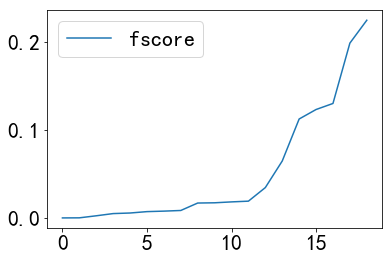

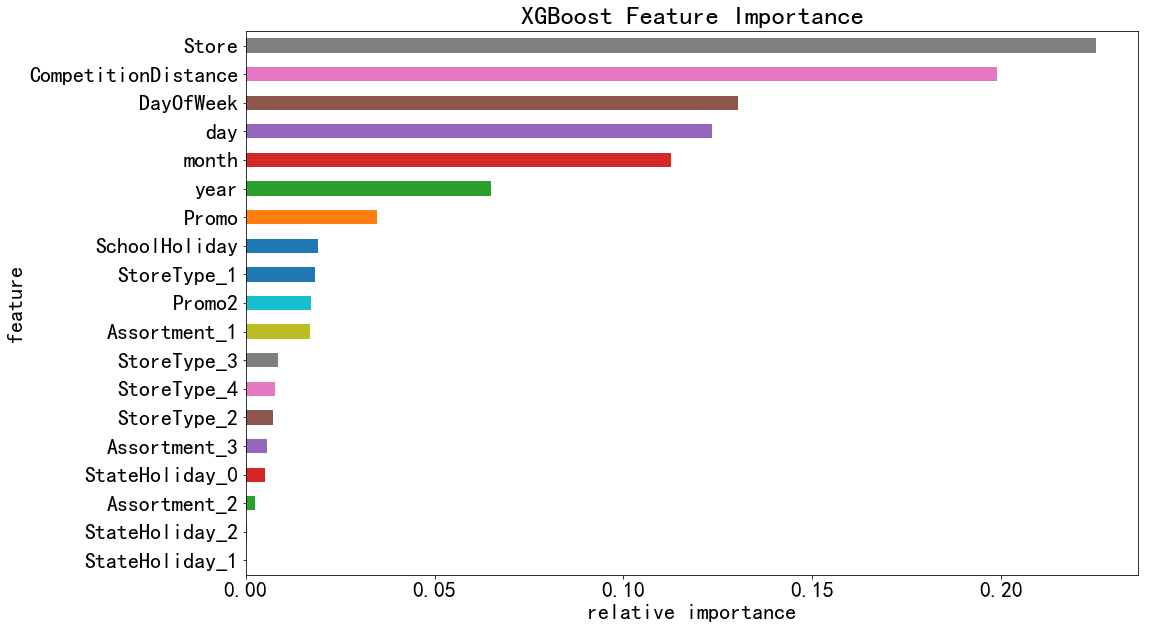

In [26]:
import operator
importance = xgboost_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

plt.show()

In [27]:
#测试数据集预测
#dtest_ids = data_test['Id']
#data_test.drop(['Id'],axis=1,inplace=True)
dtest = xgb.DMatrix(data_test)
y_test = xgboost_model.predict(dtest)
y_test = np.expm1(y_test)
print(y_test)

[ 4702.218   7899.534   8756.079  ...  6152.159  22065.75    7156.0117]


In [28]:
result={'Id':data_test_ids,'Sales':y_test}
print(type(result))
result = pd.DataFrame(result)
print(result)


<class 'dict'>
          Id         Sales
0          1   4702.217773
1          2   7899.534180
2          3   8756.079102
3          4   6046.806152
4          5   7023.341309
5          6   5513.020996
6          7   7964.499023
7          8   8052.769531
8          9   5580.524902
9         10   5407.076660
10        11   7184.057617
11        12   7711.382812
12        13   7443.393066
13        14   7329.097168
14        15   5885.473145
15        16   4787.964844
16        17   6291.916992
17        18   8981.709961
18        19   9434.145508
19        20   9621.007812
20        21   7192.079102
21        22   4873.875977
22        23   6253.446289
23        24   4686.532227
24        25   7960.511719
25        26   9699.582031
26        27   9582.599609
27        28   5795.565918
28        29   5155.561035
29        30   4801.750000
...      ...           ...
41058  41059   3962.313965
41059  41060   6257.938965
41060  41061   6500.666016
41061  41062   7105.755859
41062  41063 

In [29]:
print(result.loc[(result['Id']==544)])
print("******************************")
noOpen_nums = data_test_noPenIds.shape[0]
test_noOpen_data = np.zeros(noOpen_nums)

result_noOpen={'Id':data_test_noPenIds,'Sales':test_noOpen_data}
result_noOpen = pd.DataFrame(result_noOpen)
print(result_noOpen['Sales'])
print("&&&&&&&&&&&&&&&&&&&&&&&")
print(data_test_noPenIds.shape)
print(result_noOpen)


Empty DataFrame
Columns: [Id, Sales]
Index: []
******************************
543      0.0
676      0.0
840      0.0
1399     0.0
1532     0.0
1696     0.0
2255     0.0
2388     0.0
2552     0.0
3111     0.0
3244     0.0
3408     0.0
3424     0.0
3425     0.0
3426     0.0
3427     0.0
3428     0.0
3429     0.0
3430     0.0
3431     0.0
3432     0.0
3433     0.0
3434     0.0
3435     0.0
3436     0.0
3437     0.0
3438     0.0
3439     0.0
3440     0.0
3441     0.0
        ... 
40200    0.0
40201    0.0
40202    0.0
40203    0.0
40204    0.0
40205    0.0
40206    0.0
40207    0.0
40208    0.0
40209    0.0
40210    0.0
40211    0.0
40212    0.0
40213    0.0
40214    0.0
40215    0.0
40218    0.0
40219    0.0
40220    0.0
40221    0.0
40222    0.0
40223    0.0
40224    0.0
40225    0.0
40226    0.0
40227    0.0
40228    0.0
40229    0.0
40230    0.0
40231    0.0
Name: Sales, Length: 5984, dtype: float64
&&&&&&&&&&&&&&&&&&&&&&&
(5984,)
          Id  Sales
543      544    0.0
676      677   

In [40]:
result_total = result.append(result_noOpen)
print(result_total.shape)
print(result_total)
print("%%%%%%%%%%%%%%%%%%")
result_total.sort_values(by = 'Id',axis = 0,ascending = True,inplace=True)

result_total.to_csv ("data/result.csv" , encoding = "utf-8",index=False)
print(result_total.index)

(41088, 2)
          Id        Sales
0          1  4702.217773
1          2  7899.534180
2          3  8756.079102
3          4  6046.806152
4          5  7023.341309
5          6  5513.020996
6          7  7964.499023
7          8  8052.769531
8          9  5580.524902
9         10  5407.076660
10        11  7184.057617
11        12  7711.382812
12        13  7443.393066
13        14  7329.097168
14        15  5885.473145
15        16  4787.964844
16        17  6291.916992
17        18  8981.709961
18        19  9434.145508
19        20  9621.007812
20        21  7192.079102
21        22  4873.875977
22        23  6253.446289
23        24  4686.532227
24        25  7960.511719
25        26  9699.582031
26        27  9582.599609
27        28  5795.565918
28        29  5155.561035
29        30  4801.750000
...      ...          ...
40200  40201     0.000000
40201  40202     0.000000
40202  40203     0.000000
40203  40204     0.000000
40204  40205     0.000000
40205  40206     0.000000
4

In [41]:
print(result.loc[(result['Id']==41088)])

          Id        Sales
41087  41088  7156.011719
